In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [29]:
def Function(x):
    
    #return (3*x**2-1)/2.
    return (35.*x**4 - 30.*x**2 + 3.)/8. 

In [30]:
xi, xf, Npoints = -1.,1.,100
h = (xf-xi)/float(Npoints)

X = np.linspace(xi,xf,Npoints)
Y = Function(X)

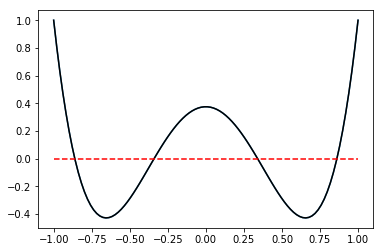

In [31]:
plt.plot(X,Y)
Y1 = np.zeros(len(X))

plt.plot(X,Y,'k')
plt.plot(X,Y1,'r--')

In [32]:
def Derivada(f,x,h):
    
    d = 0.
    
    if(h!=0):
        
        d = (f(x+h)-f(x-h))/(2*h)
        
    return d

In [34]:
# Definamos el metodo

def NewtonMethod(f,df,xn,error,it,precision=0.0001,iterations=1000):
    
    h_ = 1.0e-4
    
    while error > precision and it < iterations:
        
        try:
            
            xn1 = xn - f(xn)/df(f,xn,h_)
            
            error = np.abs((xn1-xn)/xn1)
            
            #print(xn1)
            
        except ZeroDivisionError:
            print("Hay division por cero")
            
        xn = xn1
        
        it += 1
        
       
        
    return xn1

In [35]:
root = NewtonMethod(Function,Derivada,10,100,1)

In [36]:
print(root)

0.861136324176


In [37]:
Xtest = np.linspace(-1,1,10)

for i in Xtest:
    print(NewtonMethod(Function,Derivada,i,100,0))

-0.8611363231969492
-0.8611363223909284
-0.33998104358485626
-0.3399810437223457
-0.33998104358490683
0.33998104358490683
0.3399810437223457
0.33998104358485626
0.8611363223909285
0.8611363231969492


# Interpolación de Lagrange

In [40]:
def Lagrange(x,xi,j,n):
    
    prod = 1.0
    
    for k in range(n+1):
        if(k != j):
            prod *= (x-xi[k])/(xi[j]-xi[k])
            
    return prod

In [42]:
def Poly(x,xi,fxi,n):
    
    summ = 0.
    
    for j in range(n+1):
        
        summ += fxi[j]*Lagrange(x,xi,j,n)
        
    return summ

In [43]:
X1 = [5.,10.]
Y1 = [10.,15.]

Data_ = np.arange(2,12+0.5,0.5)
print(Data_)

[ 2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5
  9.   9.5 10.  10.5 11.  11.5 12. ]


In [44]:
px1 = Poly(Data_,X1,Y1,1)

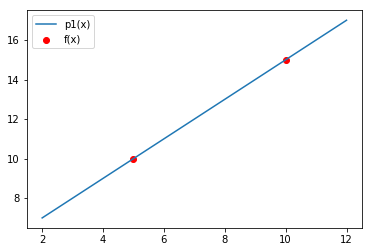

In [51]:
plt.scatter(X1,Y1,color='r',label='f(x)')
plt.plot(Data_,px1,label='p1(x)')
plt.legend()